<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Principal Component Analysis (PCA)</b></p>

<hr style="height:5px;border:none" />

# 1. Motivation
<hr style="height:1px;border:none" />

Say, your data consists of a number of correlated variables. A **principal component analysis** (**PCA**) allows you to transform such data into a small number of uncorrelated variables, known as **principal components**. Principal components (PCs) are ordered so that the first PC explains the most variability in the data, the second PC explains the second most variability, and so on. A PCA is thus considered a *dimension reduction method*, transforming a high-dimensional data set into a lower dimensional space.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in `Scikit-learn`. The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length, and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots.

In [1]:
%matplotlib inline

Here is a program to plot data, all the features against each other.

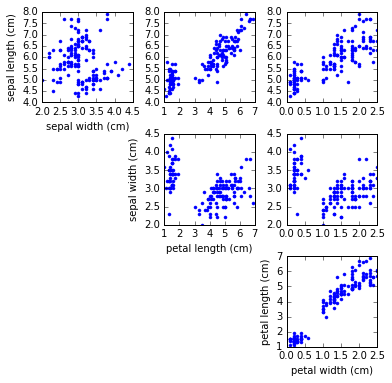

In [2]:
# plotting the iris data

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# loading the iris data set
iris = datasets.load_iris()
X = iris.data   # 2D data array
varNames = iris.feature_names  # variable names
nVar = X.shape[1]  # number of features

# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        plt.plot(X[:,iCol], X[:,iRow], 'b.')
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.show()

You may notice that these features are correlated. You may also notice that how cumbersome it is just to examine the data set. The more features you have, the more complicated the plots become. So perhaps we can generate a *summary* feature encompassing variability of all these features. 

Here is a simple program to perform a PCA on this data set.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

# loading the iris data
iris = datasets.load_iris()
X = iris.data   # 2D data array

# applying PCA
pca = PCA(n_components=2)  # creating a PCA transformation with 2 PCs
X_r = pca.fit_transform(X) # fit the data, get 2 PCs

Here, **`PCA`** is a transformation object. We are interested in determining the largest 2 PCs, so we set **`n_components=2`**. In theory, the number of PCs we can determine is the number of features in the data set. Once the PCA object is defined as **`pca`**, then the **`fit_transform`** method is used to determine the transformation from the original data set to the collection of PCs. 

The PCs are stored in a 2D array **`X_r`**.

In [4]:
X_r.shape

(150, 2)

The number of rows corresponds to the number of observations, and the number of columns corresponds to the number of PCs (2 in this case).

In [5]:
# proportion of the variance explained
print(pca.explained_variance_ratio_)

[ 0.92461621  0.05301557]


Here, the attribute **`explained_variance_ratio_`** stores the amount of variability in the data explained by each PC. The first PC explains 92% of variability,  whereas the second PC explains a little over 5%.

In [6]:
# PCs are uncorrelated
print(np.corrcoef(X_r, rowvar=False))

[[  1.00000000e+00  -1.98864115e-17]
 [ -1.98864115e-17   1.00000000e+00]]


Here, we see that the two PCs are uncorrelated, with very a very small correlation coefficient.

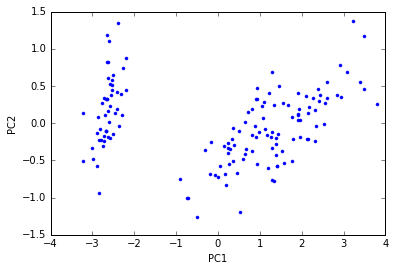

In [7]:
# plotting PCs
plt.plot(X_r[:,0], X_r[:,1],'b.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Here, PC1 and PC2 are plotted. This plot may not mean much, until we add the target information (i.e., different types of irises) to the plot.

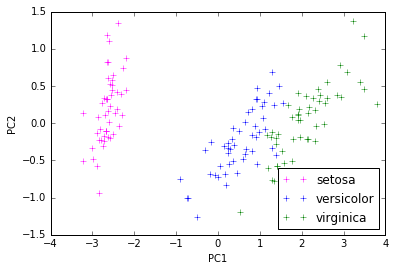

In [8]:
# plotting PCs with the target
Y = iris.target
targetNames = iris.target_names
targetColors = ['magenta', 'blue', 'green']
for iTarget in range(3):
    plt.plot(X_r[Y==iTarget,0],X_r[Y==iTarget,1], marker='+', ls='none',
         c=targetColors[iTarget], label=targetNames[iTarget])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=4)
plt.show()

As you can see, different types of irises tend to *cluster* into groups. A PCA is able to separate these groups to a certain degree.

What exactly are PC1 and PC2? In a nutshell, these are *linear combinations* of features. You can examine these linear combinations by

In [9]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Here, the first row describes the linear combination of features for PC1. The second row corresponds to PC2. In a technical term, they are often referred to as *eigenvectors*.

# 2. Dimension reduction with PCA
<hr style="height:1px;border:none" />

PCA is useful in projecting a high-dimensional data set to a lower dimensional space, a.k.a., *dimension reduction*. To demonstrate this, we shall examine the digits data set available in `Scikit-learn`. This data set contains 1797 observations of hand-written digits (0-9). Each observation is an 8x8 image of a hand-written digit, on a 16-level gray scale. Here are some examples of the digit data.

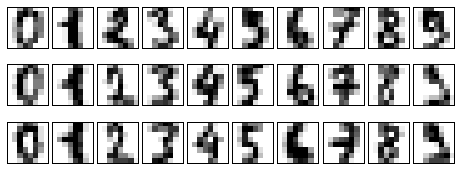

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsImages = digits.images  # image data, 1797 x 8 x 8
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits

# examples of the digits data
plt.figure(figsize=(8,3))
for iImg in range(3):
    for jImg in range(10):
        plt.subplot(3,10,iImg*10+jImg+1)
        plt.imshow(digitsImages[iImg*10+jImg], cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Now let's run a PCA with 2 components, and plot the resulting PCs.

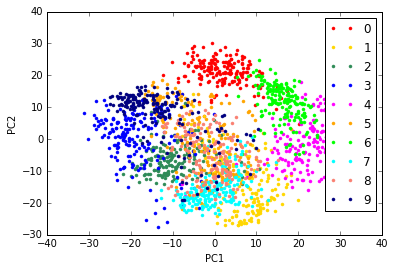

In [11]:
# PCA with largest 2 PCs
digitsPCA = PCA(n_components=2)
digitsPCs = digitsPCA.fit_transform(digitsX)


# plotting the PCs
targetColors=['red','gold','seagreen','blue','fuchsia',
              'orange','lime','cyan','salmon','navy']
for i in range(10):
    plt.plot(digitsPCs[digitsTargets==i,0],
             digitsPCs[digitsTargets==i,1],
             marker='.', ls='none', c=targetColors[i],
             label=digitsFeatureNames[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

As you can see, some digits can be separated easily from other digits (e.g., 0, 4, and 6), whereas some digits are hard to distinguish. 

Now let's take a look at the *eigenimages* corresponding to PC1 and PC2.

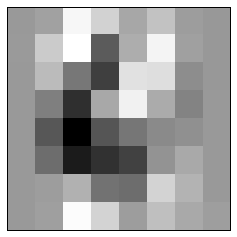

In [12]:
# PC1 eigenimage
plt.imshow(digitsPCA.components_[0,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()

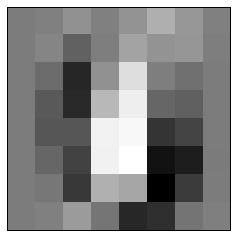

In [13]:
# PC2 eigenimage
plt.imshow(digitsPCA.components_[1,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()

In these eigenimages, darker pixels contribute large variability, whereas lighter pixels contribute small variability.